# Simple CNN for MNIST 

Using the MNIST dataset (70 000 pictures of hand-written digits) we will train a simple CNN, which is able to predict a digit given a picture of a hand-written digit with 99% accuracy. 

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


Network parameters:

In [2]:
batch_size = 1280
nb_classes = 10
nb_epoch = 5

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

Prepare data into training and test set.

In [3]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(X_train.shape[0],img_cols, img_rows,  1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows,  1)
input_shape = (img_rows, img_cols, 1)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


Build the CNN. 

In [7]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

c:\users\ibm_admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  """
c:\users\ibm_admin\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys


Show a summary of the model parameters. 

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

And now train the model and evaluate on the test set. 

In [9]:
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))

c:\users\ibm_admin\appdata\local\programs\python\python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 162s - loss: 1.0623 - acc: 0.6632 - val_loss: 0.3399 - val_acc: 0.9073
Epoch 2/5
60000/60000 [==============================] - 157s - loss: 0.4147 - acc: 0.8733 - val_loss: 0.2445 - val_acc: 0.9253
Epoch 3/5
60000/60000 [==============================] - 158s - loss: 0.3009 - acc: 0.9095 - val_loss: 0.1667 - val_acc: 0.9490
Epoch 4/5
60000/60000 [==============================] - 156s - loss: 0.2386 - acc: 0.9293 - val_loss: 0.1234 - val_acc: 0.9638
Epoch 5/5
60000/60000 [==============================] - 153s - loss: 0.1967 - acc: 0.9408 - val_loss: 0.0992 - val_acc: 0.9701


In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0991769457784
Test accuracy: 0.9701


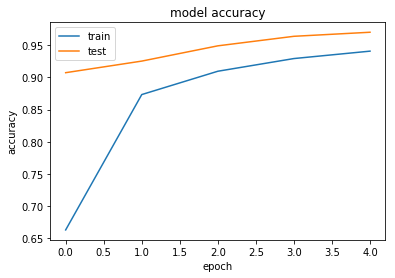

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()